In [19]:
import pickle
import xarray as xr
import pandas as pd
import scipy.stats as stats
import numpy
import matplotlib.pyplot as plt

Here we evaluate the robustness of each of the 6 atmospheric inversion models to the Global Carbon Project observations.<br><br>
Note that GCP land flux = land (from DGVMs) + BIM (budget imbalance) which represents the residual flux. This keeps the analysis consistent with comparing models to observations (GCP).

# Global Uptake timeseries

In [7]:
CAMS = pd.read_csv("./../Output/output_raw/output_CAMS.csv").set_index("Year")
CTRACKER = pd.read_csv("./../Output/output_raw/output_CTRACKER.csv").set_index("Year")
Rayner = pd.read_csv("./../Output/output_raw/output_Rayner.csv").set_index("Year")
JAMSTEC = pd.read_csv("./../Output/output_raw/output_JAMSTEC.csv").set_index("Year")
JENA_s76 = pd.read_csv("./../Output/output_raw/output_JENA_s76.csv").set_index("Year")
JENA_s85 = pd.read_csv("./../Output/output_raw/output_JENA_s85.csv").set_index("Year")

In [25]:
fGCB = './../../Prelim_Data_Analysis/gcb_data/budget.csv'
GCB = pd.read_csv(fGCB,
                 index_col=0,
                 usecols=[0,4,5,6])
GCB = -GCB
GCB.head()

,ocean sink,land sink,budget imbalance
Year,,,
1959,-0.852376,-0.516073,-0.860316
1960,-0.819017,-1.394030,-0.522722
1961,-0.714842,-0.605098,-1.213762
1962,-0.756709,-1.348349,-0.959605
1963,-0.904997,-0.877794,-1.355333


0.7632484567409027

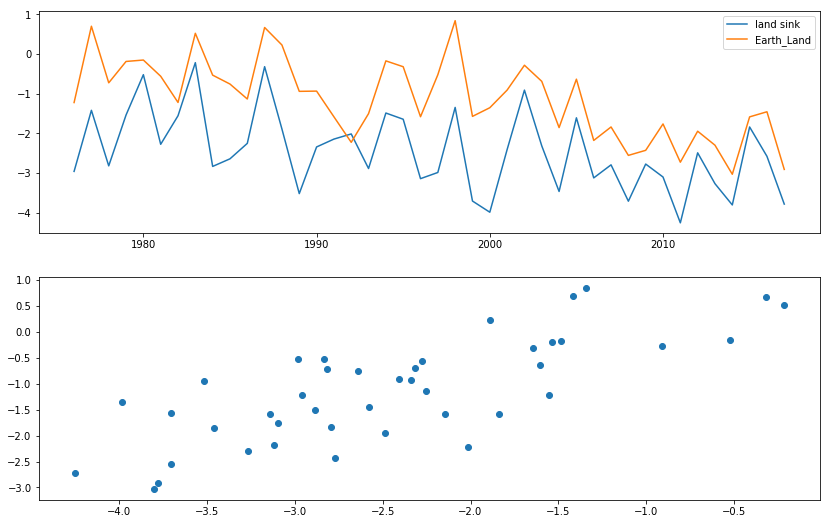

In [38]:
plt.figure(figsize=(14,9))
plt.subplot(211).plot(GCB.loc[1976:].index, GCB.loc[1976:]["land sink"])
plt.subplot(211).plot(GCB.loc[1976:].index, JENA_s76.Earth_Land)
plt.legend()
plt.subplot(212).scatter(GCB.loc[1976:]["land sink"], JENA_s76.Earth_Land)
stats.linregress(GCB.loc[1976:]["land sink"], JENA_s76.Earth_Land)[2]

Other things to do:
- Frequency correlation
- Cross-correlation
- Refer to stats course (sem 1) for more things to do

# Rolling gradient